In [1]:
#reqiured libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#get the path of our current working directory
os.getcwd()

'C:\\Users\\mohit\\OneDrive\\Computer Graphics\\Computer-Graphics-Project'

## We detect every photo in our dataset training-data

In [3]:
#changing the directory to training data
os.chdir("training-data/")
#list the directories in training-data
dirs = os.listdir()
dirs

['s1']

In [4]:
#changing to s1 directory
os.chdir(dirs[0])

In [5]:
#listing the images in s1 directory
images = os.listdir()
images

['IMG20201019165503.jpg',
 'IMG20201019165504.jpg',
 'IMG20201019165505.jpg',
 'IMG20201019165506.jpg',
 'IMG20201019165508.jpg',
 'IMG20201019165509.jpg',
 'IMG20201019165510.jpg',
 'IMG20201019165511.jpg',
 'IMG20201019165512.jpg',
 'IMG20201019165516.jpg',
 'IMG20201019165518.jpg',
 'IMG20201019165519.jpg',
 'IMG20201019165521.jpg',
 'IMG20201019165522.jpg',
 'IMG20201019165525.jpg',
 'IMG20201019165550.jpg',
 'IMG20201019165552.jpg',
 'IMG20201019165555.jpg',
 'IMG20201019165603.jpg',
 'IMG20201019165605.jpg',
 'IMG20201019165607.jpg',
 'IMG20201019165619.jpg']

In [6]:
#return the control back to the directory where our code is 
os.chdir("..")
os.chdir("..")
os.getcwd()

'C:\\Users\\mohit\\OneDrive\\Computer Graphics\\Computer-Graphics-Project'

In [7]:
#this is the cascade classifier function  which return the 
#key element that detect there is a face in a image
face_cascade = cv2.CascadeClassifier("Classifiers/haarcascade_frontalface_alt.xml")

In [8]:
#vairable for storing faces and the label of corresponding face 
#label gives unique id to which this face belong
faces = []
labels = []   #it is like id

In [9]:
#it the list that is to be displayed on image when a face from particular folder is detected
#subjects[0] for s0 folder
#subjects[1]  for s1 folder therefore mohit is stored in index 1 of subjects
subjects = ["", "Mohit"]

In [4]:
# iterate over the images list in th folder s1 
for img_name in images:
    #removing the ".jpg" from string so that only number remains
    label = img_name[0:-4]
    
    #read image
    #converting the path from string name which will be used for reading the particular image
    path = "training-data\\s1\\" + img_name
    #reading the image so that it can train our classifier
    img = cv2.imread( path ,0)
    
    #detect face on image
    #detect multiscale function the coordinate of boxes in which it think face is present
    face_coordinate = face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5,minSize=(30, 30),flags=cv2.CASCADE_SCALE_IMAGE)
    #face_coordinate is a list of [[x1,y1,w1,h1],[x2,y2,w2,h2].....]
#     x1,y1 coordinate of face 1 
#     w1,h1 width and height of rectangle for first face

#if face does not exist in image then we do nothing
    if len(face_coordinate) == 0:
        pass
    else:
#we extract the coordinate of first face in the image
#we assume the training data has images with only one face
        x,y,w,h = face_coordinate[0]
        print(x,y,w,h)
        #append the faces list which store only face inside the retangle 
        #and also storwe label according to the name of image
        #as s1 is for user 1 and we have only one folder label is 1 always 
        faces.append( img[y:y+w, x:x+h] )
        labels.append(1)

NameError: name 'images' is not defined

<ipython-input-11-05b714b55ba8>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

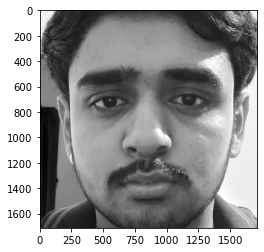

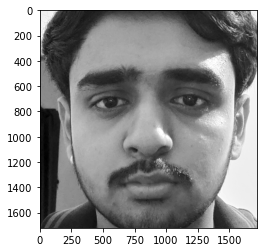

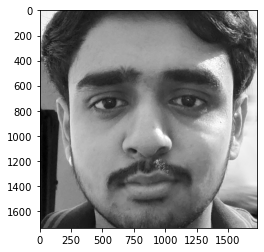

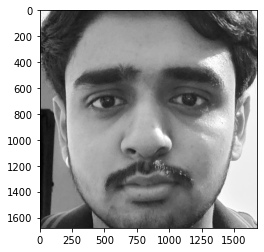

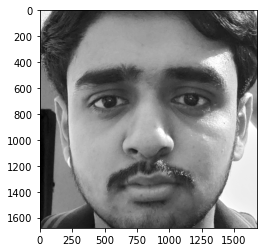

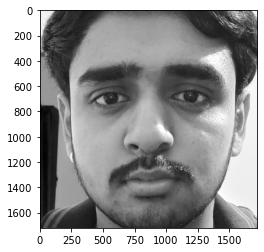

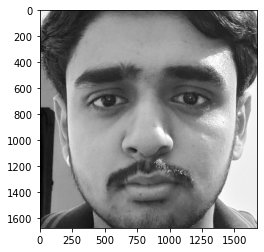

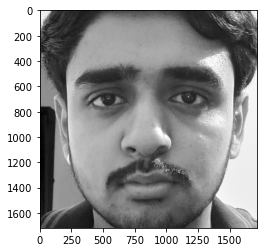

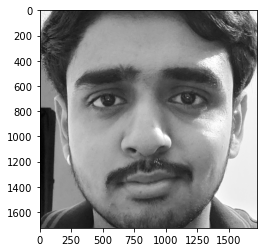

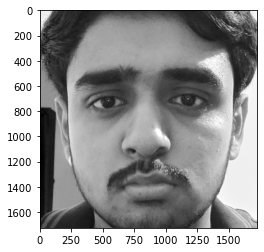

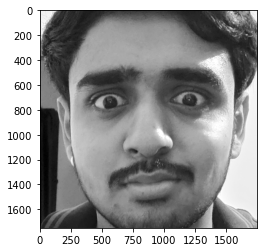

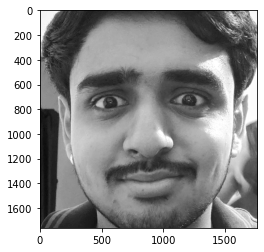

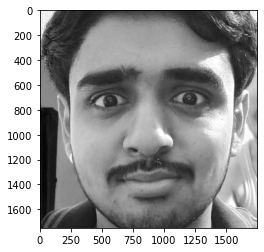

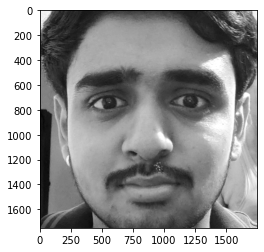

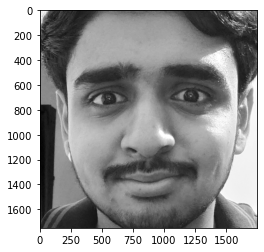

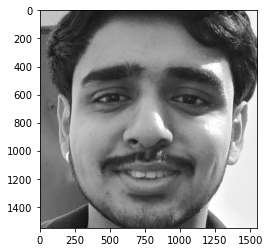

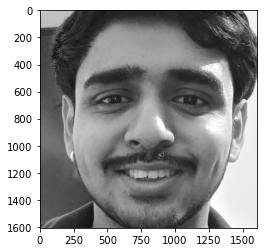

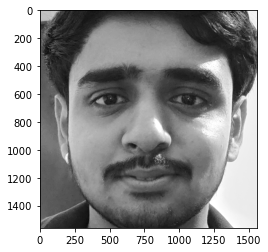

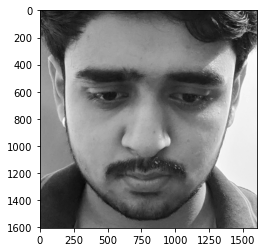

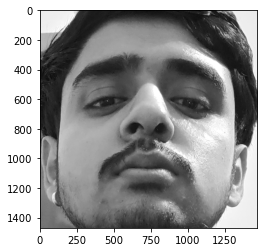

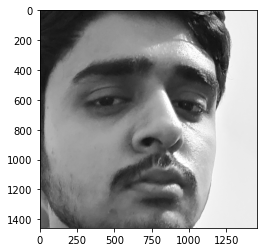

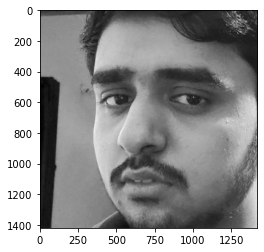

In [11]:
#this loop print the images of face in faces list
#if the number of images in dataset is large then comment this code out
for i in faces:
    plt.figure()
    plt.imshow(i, cmap="gray")
    
labels

In [12]:
len(faces)

22

In [13]:
len(labels)    #both faces and labels length should be same

22

In [14]:
#create a face recognizer object
#this object takes a list of faces and train itself so that if any unknown image is given to it
#it will detect the trained face in unknown image
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
# face_recognizer = cv2.face.FisherFaceRecognizer_create()
face_recognizer

<face_LBPHFaceRecognizer 000001F73E8E3DB0>

In [15]:
#train the face recognizer for the data set of images
#it takes faces and labels
face_recognizer.train(faces, np.array(labels))

In [16]:
#functions to draw ractangle and write text
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 5)
 
#function to draw text on give image starting from
#passed (x, y) coordinates. 
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 255), 3)

In [17]:
#this function takes the unknown image and detects the faces that exist on image 
#then that faces are given to recognizer function which recognizes the face 
# if the face match with trained dataset then draw rectangle with name
#otherwise leave the face
def predict(test_img):
    
    face_coordinate = face_cascade.detectMultiScale(test_img, scaleFactor=1.3, minNeighbors=5)
    
    for x,y,w,h in face_coordinate:
        face = test_img[y:y+w, x:x+h]
        #making predictions
        label, confidence = face_recognizer.predict(face)
        
        confidence = 100 - round(confidence, 2)
        label_text = subjects[label]
    
        if confidence > 75.00:
            draw_rectangle(test_img, [x,y,w,h])
            draw_text(test_img, label_text, x, y-5)
            print(confidence)
 
    return test_img

In [18]:
#this function is just the muniature version of upper function it detect all the face in the image
def faces_detected_are(img):
    face_coordinate = face_cascade.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5)
    
    for x,y,w,h in face_coordinate:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),7)
    return img

## Now Check Code By inserting your own Images

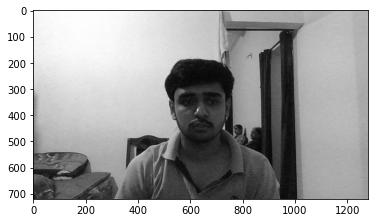

In [19]:
#read the unknown image 
i = cv2.imread("mohit_present.jpg",0)
plt.imshow(i,cmap="gray")

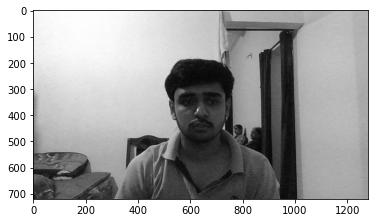

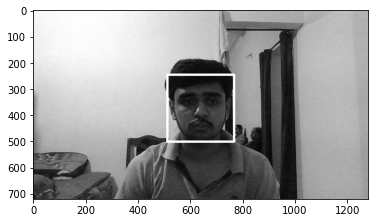

In [20]:
#print the image with all the detected faces
plt.figure(121)
plt.legend("all the detected face")
plt.imshow(faces_detected_are(i.copy()), cmap="gray")

#print the image with the actual recognized face
plt.figure(122)
plt.legend("Recognized face")
plt.imshow(predict(i.copy()),cmap="gray" )